## NRM regions

This notebook gives a basic demonstration of the shapefiles found at:  
`/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/nrm_regions/`

The most recent climate projections for Australia make extensive use of eight natural resource management (NRM) clusters, which can be further divided into sub-clusters or combined into super-clusters.  
https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/

The edges of the shapefiles available for download at that the Climate Change in Australia website don't exactly match the coastline of Australia (see figures below), so we use NRM shapefiles provided by the Bureau of Meteorology that have been clipped to the coastline.

In order to produce the shapefiles demonstrated below,
the `processing_scripts/process_nrm.py` script applies some minor changes to the BoM files.

In [1]:
import geopandas as gp
from IPython.display import Image
import matplotlib.pyplot as plt

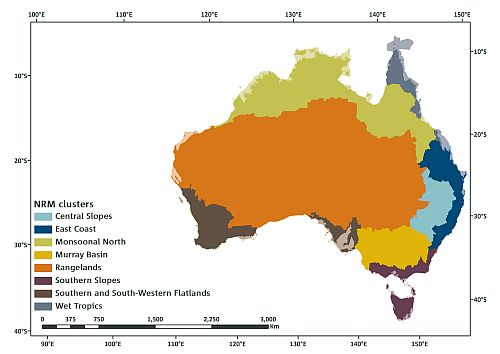

In [2]:
#https://www.climatechangeinaustralia.gov.au/media/ccia/2.2/cms_page_media/238/NRM_CCIA_clusters.jpg
Image(filename='figures/NRM_CCIA_clusters.jpg')

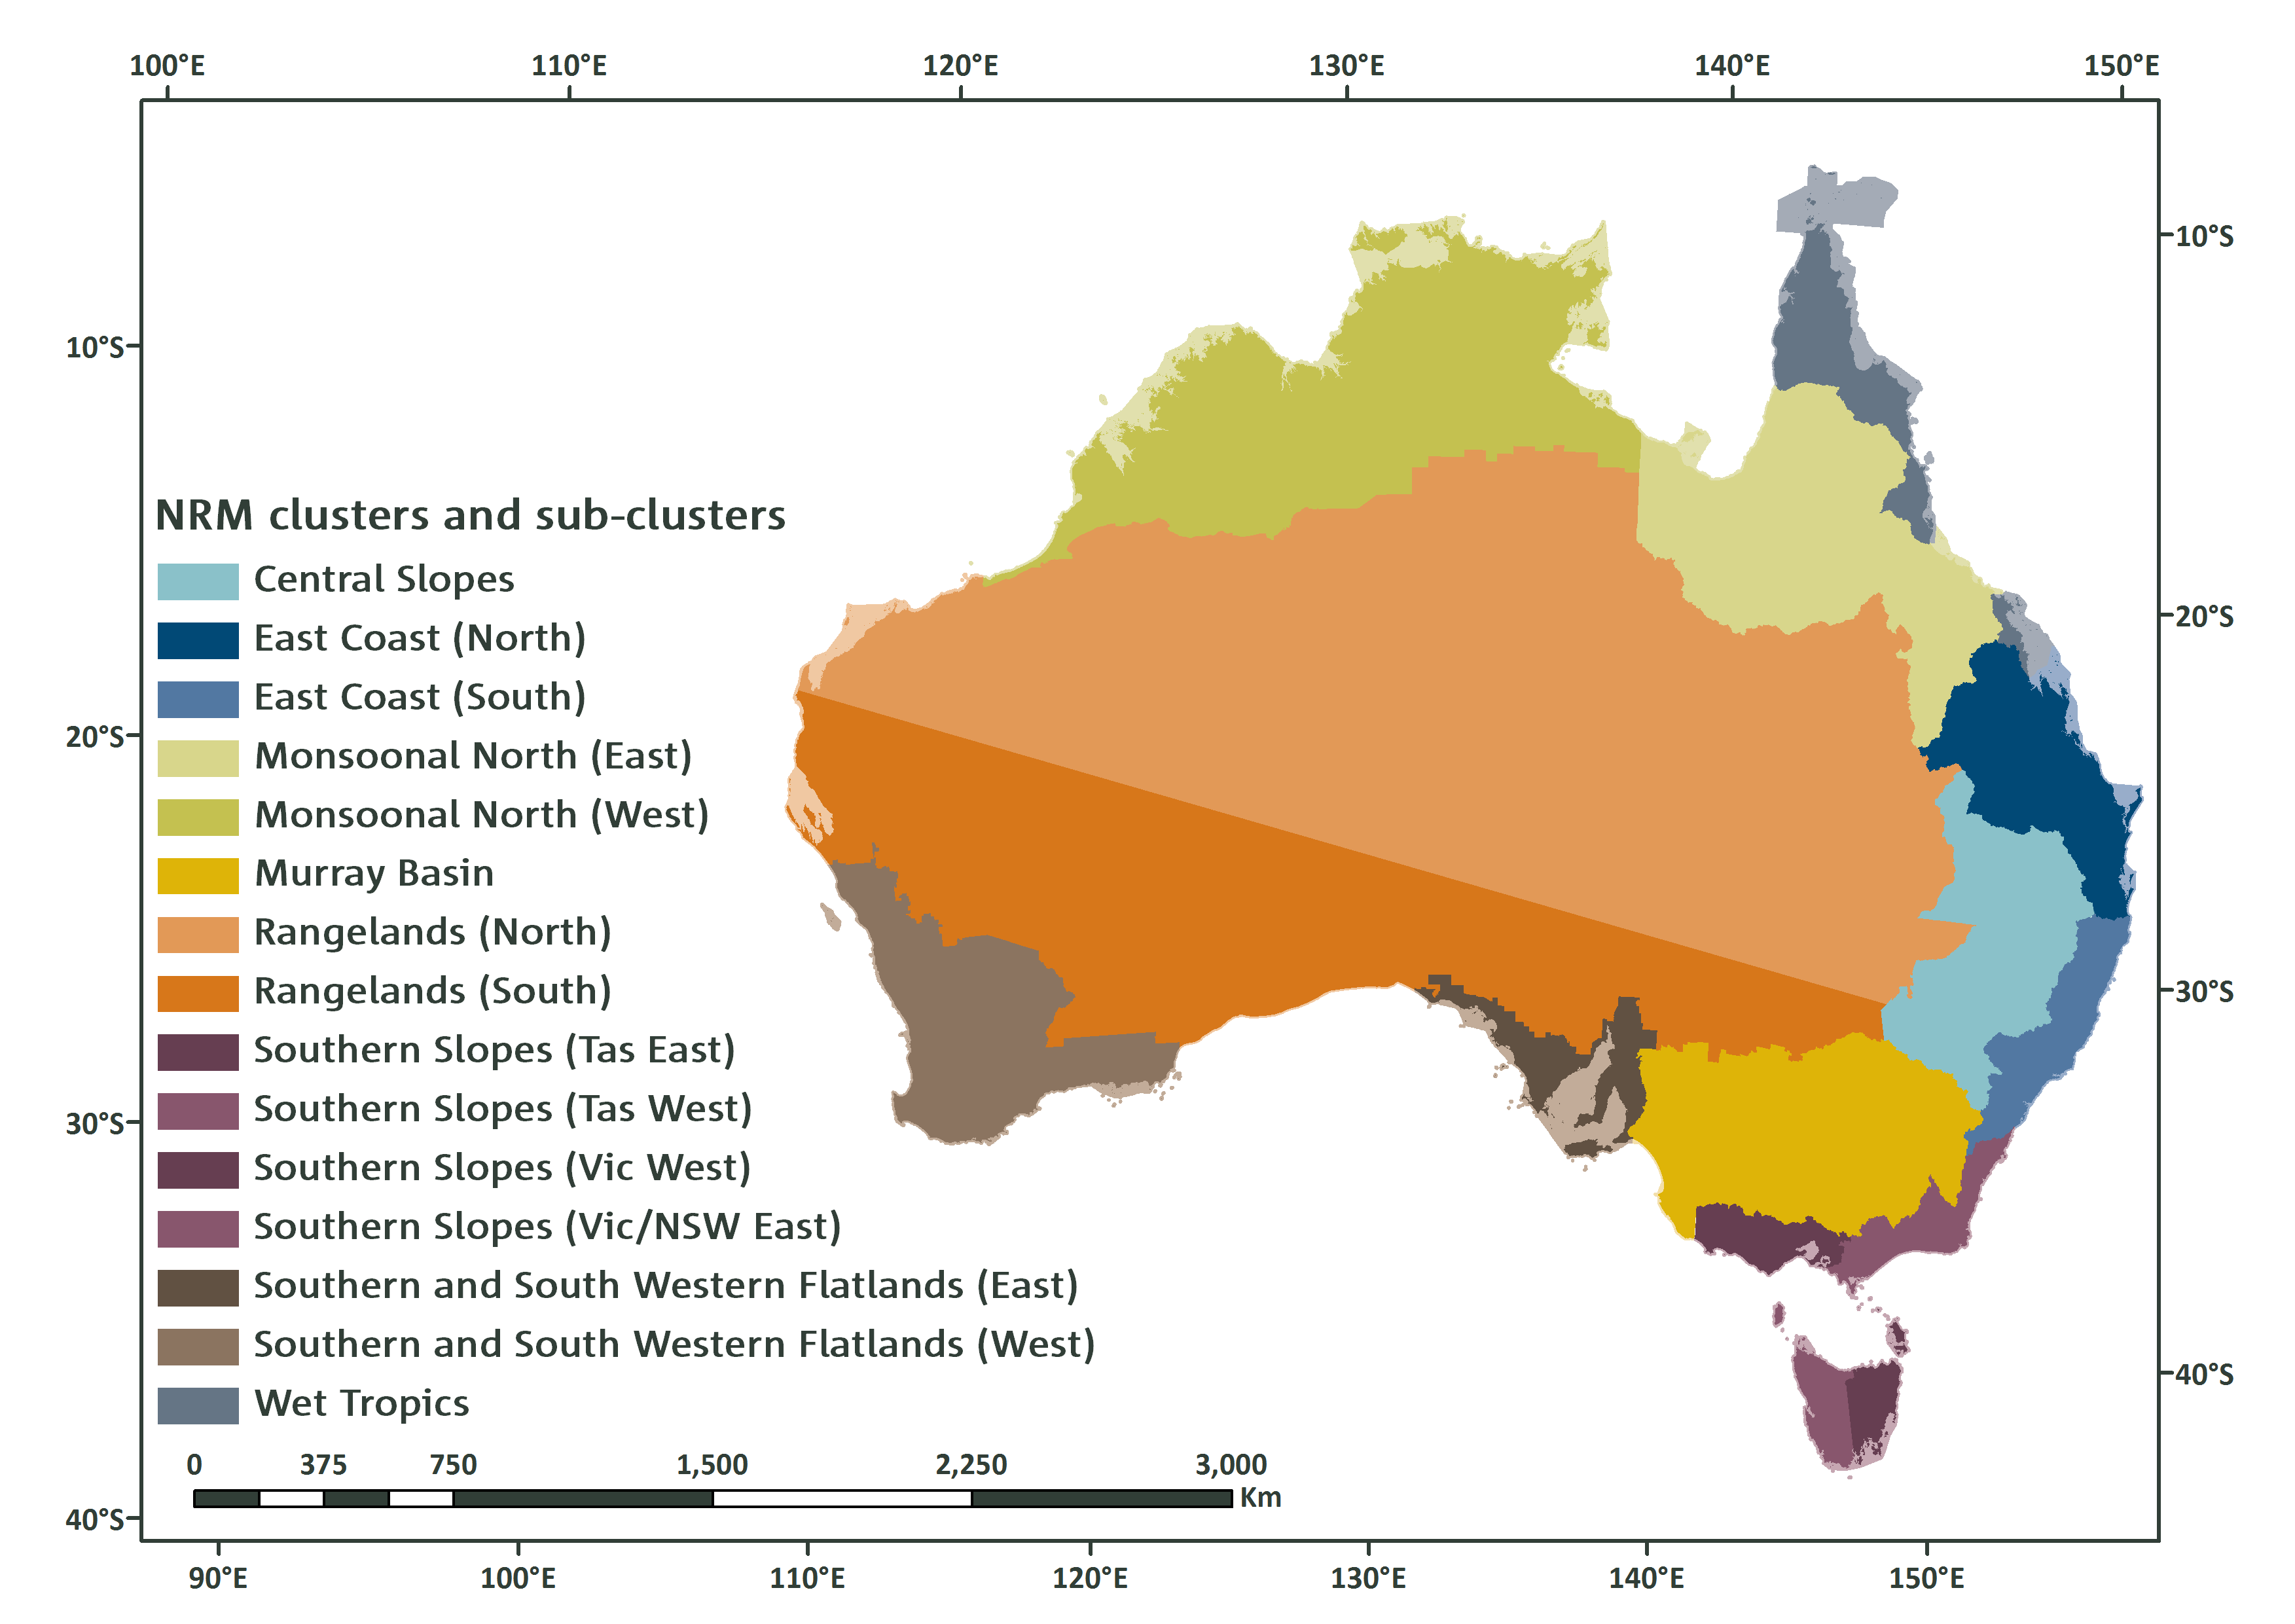

In [3]:
# https://www.climatechangeinaustralia.gov.au/media/ccia/2.2/cms_page_media/238/NRM_CCIA_sub_clusters.png
Image(filename='figures/NRM_CCIA_sub_clusters.png', width=500)

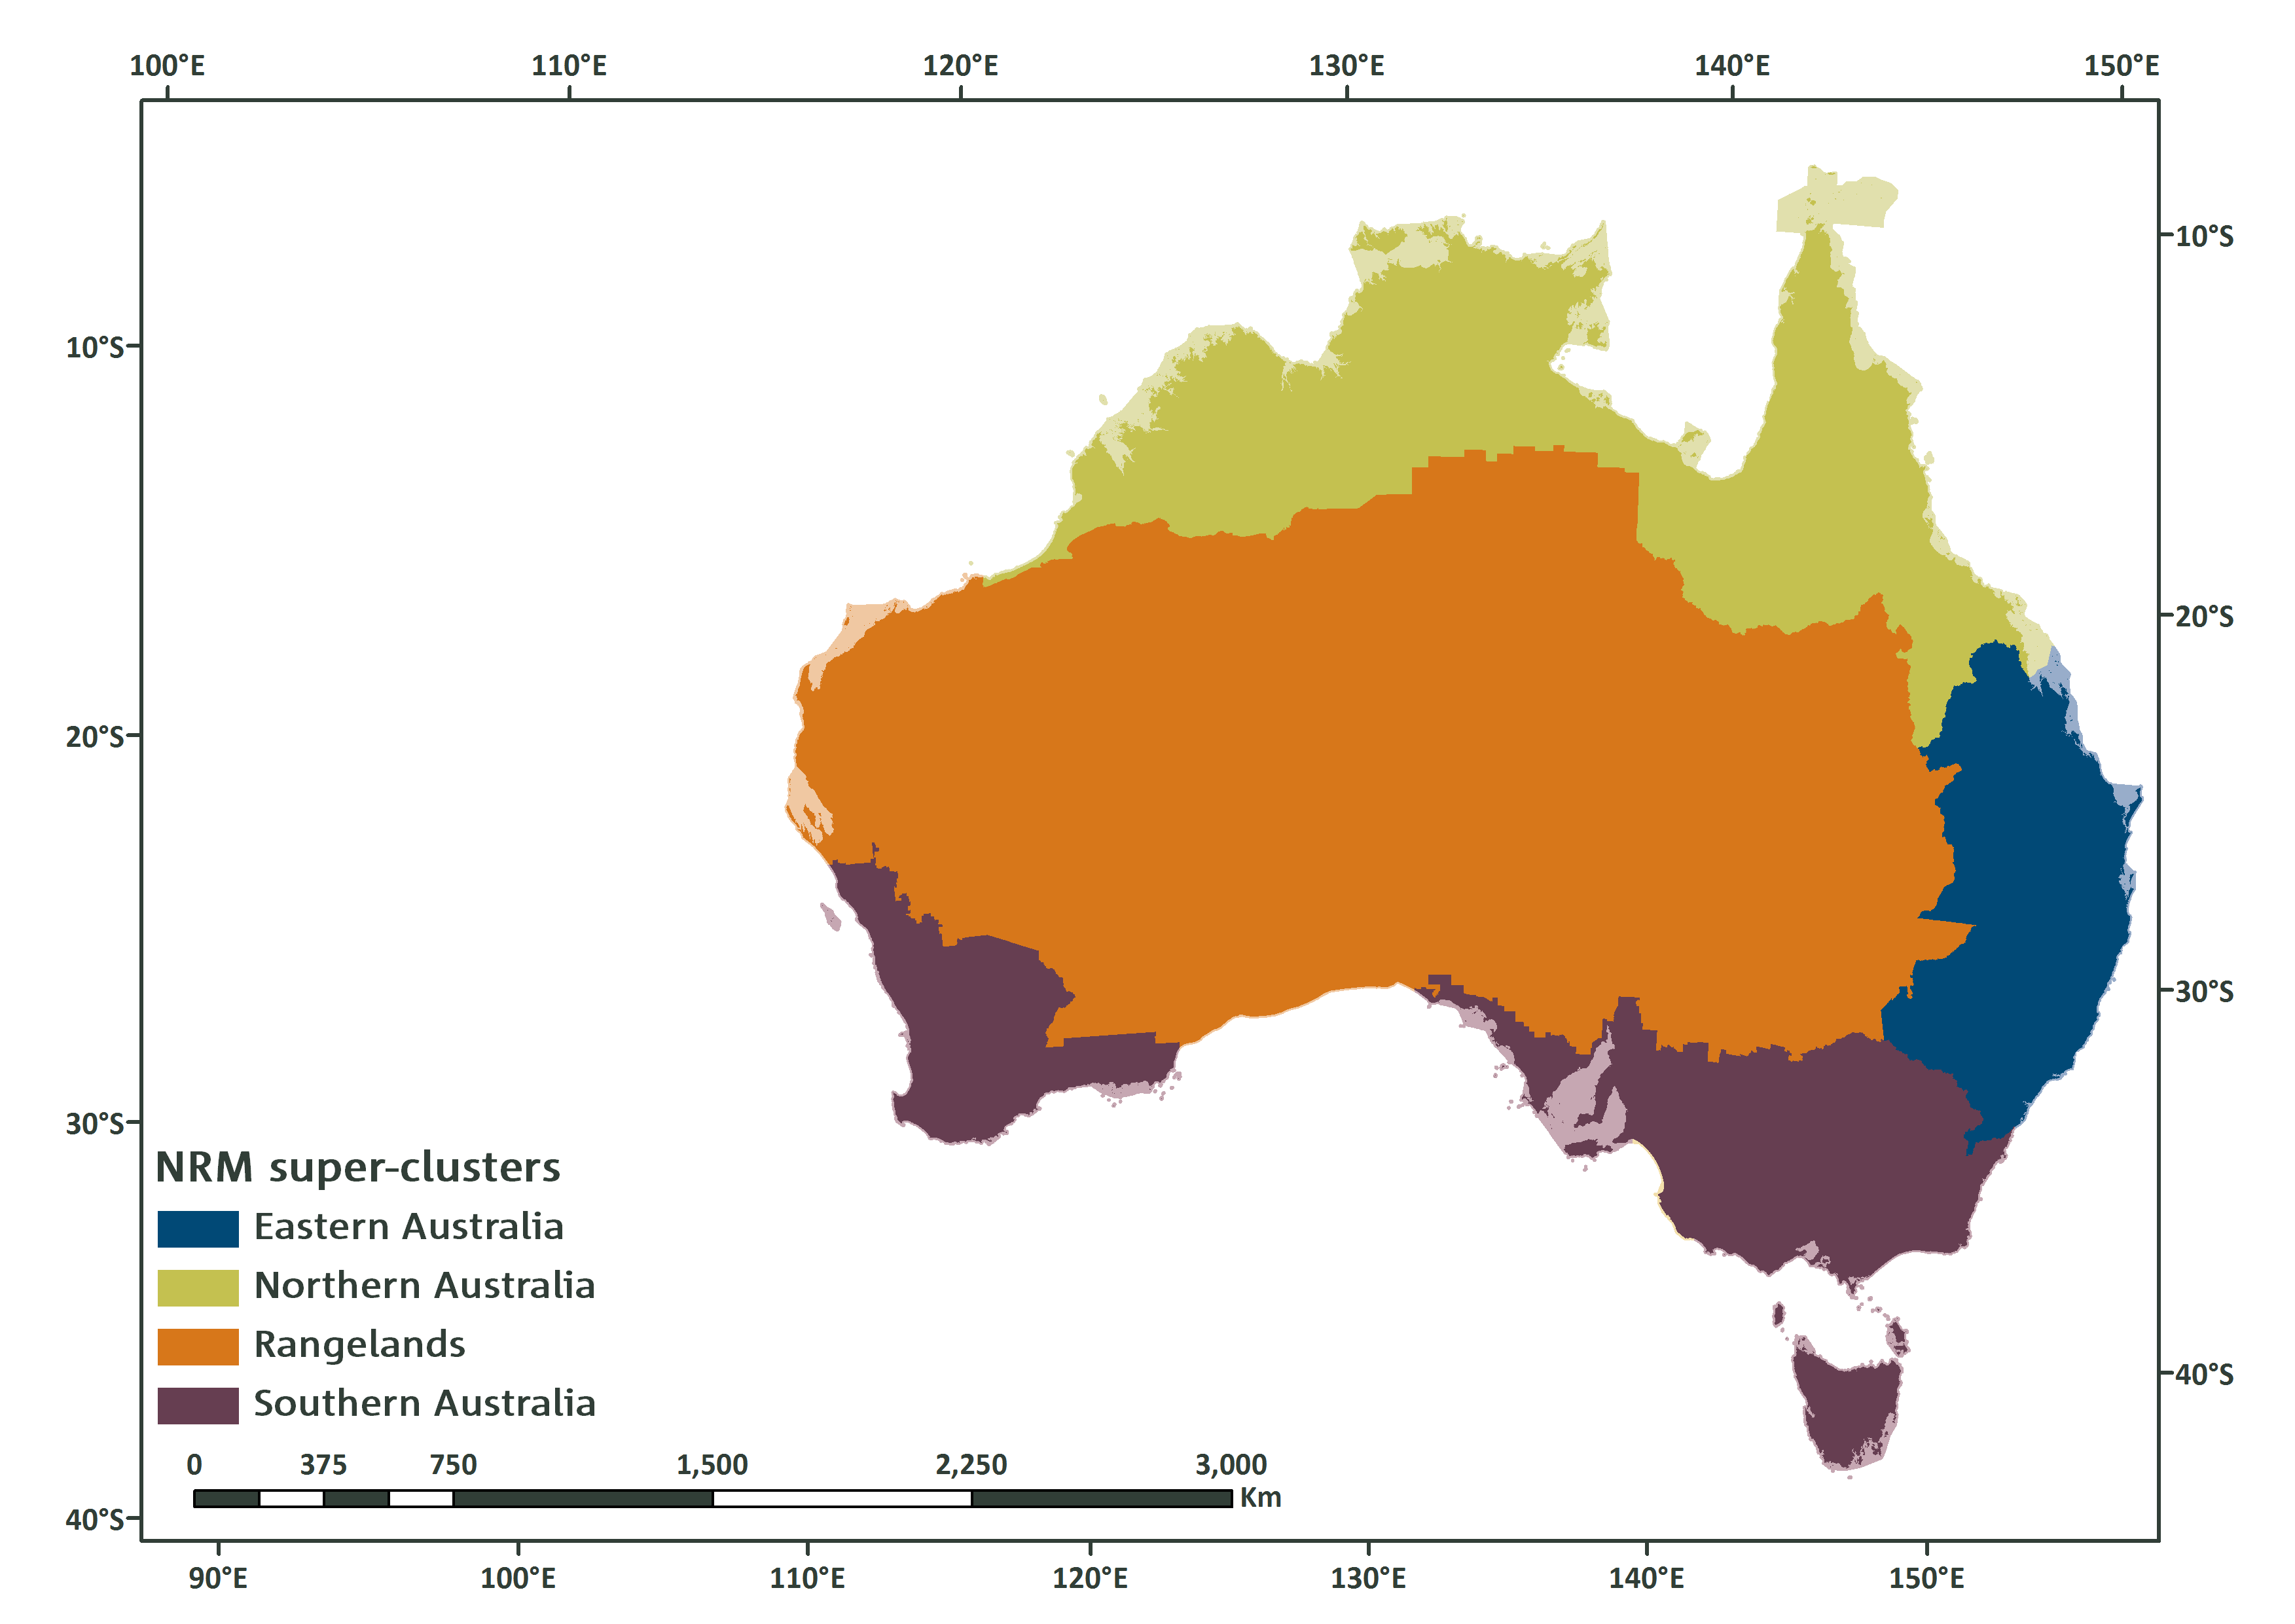

In [4]:
# https://www.climatechangeinaustralia.gov.au/media/ccia/2.2/cms_page_media/238/NRM_CCIA_super_clusters.png
Image(filename='figures/NRM_CCIA_super_clusters.png', width=500)

In [5]:
nrm_regions_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/nrm_regions/nrm_regions.shp'

In [6]:
nrm_regions = gp.read_file(nrm_regions_file)

In [7]:
nrm_regions

,SubClusNm,SubClusAb,ClusterNm,ClusterAb,SupClusNm,SupClusAb,geometry
0,Wet Tropics,WT,Wet Tropics,WT,Northern Australia,NA,"MULTIPOLYGON (((148.46142 -20.06680, 148.46219..."
1,Rangelands (North),RN,Rangelands,R,Rangelands,R,"MULTIPOLYGON (((114.17846 -21.80762, 114.18413..."
2,Monsoonal North (East),MNE,Monsoonal North,MN,Northern Australia,NA,"POLYGON ((146.29458 -18.89926, 146.29742 -18.9..."
3,Monsoonal North (West),MNW,Monsoonal North,MN,Northern Australia,NA,"POLYGON ((137.99467 -16.54112, 137.99491 -16.9..."
4,East Coast (South),ECS,East Coast,EC,Eastern Australia,EA,"POLYGON ((153.53441 -28.17701, 153.53442 -28.1..."
5,Central Slopes,CS,Central Slopes,CS,Eastern Australia,EA,"POLYGON ((147.95700 -24.87855, 147.95711 -24.8..."
6,Murray Basin,MB,Murray Basin,MB,Southern Australia,SA,"POLYGON ((145.74765 -32.21733, 145.75054 -32.2..."
7,Southern and South Western Flatlands (West),SSWFW,Southern and South Western Flatlands,SSWF,Southern Australia,SA,"POLYGON ((124.21316 -33.03955, 124.21087 -33.0..."
8,Southern and South Western Flatlands (East),SSWFE,Southern and South Western Flatlands,SSWF,Southern Australia,SA,"POLYGON ((139.35429 -33.09761, 139.35429 -33.0..."
9,Southern Slopes (Vic/NSW East),SSVE,Southern Slopes,SS,Southern Australia,SA,"POLYGON ((150.99392 -34.22148, 150.99430 -34.2..."


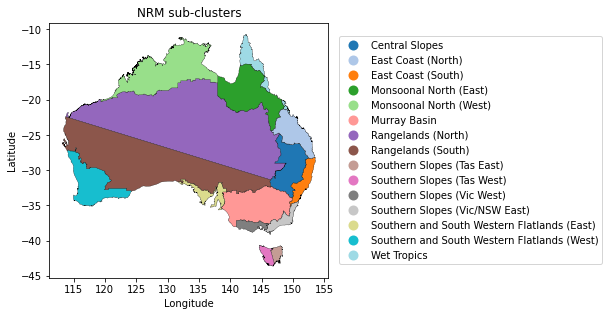

In [8]:
nrm_regions.plot(
    figsize=[5, 5],
    column='SubClusNm',
    cmap='tab20',
    legend=True,
    linewidth=0.25,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (2.0, 0.5)},
)
plt.title('NRM sub-clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Sub-clusters can be dissolved into Clusters...

In [9]:
nrm_clusters = nrm_regions.dissolve(by='ClusterNm', as_index=False)
nrm_clusters = nrm_clusters.drop(columns=['SubClusNm', 'SubClusAb'])
nrm_clusters = nrm_clusters[['ClusterNm', 'ClusterAb', 'SupClusNm', 'SupClusAb', 'geometry']]

In [10]:
nrm_clusters

,ClusterNm,ClusterAb,SupClusNm,SupClusAb,geometry
0,Central Slopes,CS,Eastern Australia,EA,"POLYGON ((147.95700 -24.87855, 147.95711 -24.8..."
1,East Coast,EC,Eastern Australia,EA,"MULTIPOLYGON (((153.53442 -28.17702, 153.53471..."
2,Monsoonal North,MN,Northern Australia,NA,"POLYGON ((146.29742 -18.90381, 146.29992 -18.9..."
3,Murray Basin,MB,Southern Australia,SA,"POLYGON ((145.74765 -32.21733, 145.75054 -32.2..."
4,Rangelands,R,Rangelands,R,"POLYGON ((114.14357 -22.53800, 114.14296 -22.5..."
5,Southern Slopes,SS,Southern Australia,SA,"MULTIPOLYGON (((147.04597 -43.31409, 147.04370..."
6,Southern and South Western Flatlands,SSWF,Southern Australia,SA,"MULTIPOLYGON (((139.35429 -33.09761, 139.35429..."
7,Wet Tropics,WT,Northern Australia,NA,"MULTIPOLYGON (((148.46219 -20.06725, 148.46352..."


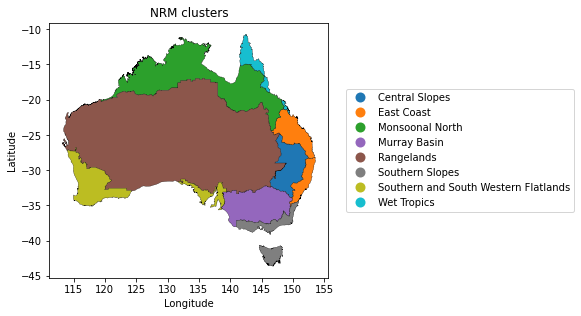

In [11]:
nrm_clusters.plot(
    figsize=[5, 5],
    column='ClusterNm',
    cmap='tab10',
    legend=True,
    linewidth=0.25,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (1.9, 0.5)},
)
plt.title('NRM clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

... and the original Sub-Clusters can also be dissolved into Super-Clusters

In [12]:
nrm_super_clusters = nrm_regions.dissolve(by='SupClusNm', as_index=False)
nrm_super_clusters = nrm_super_clusters.drop(columns=['SubClusNm', 'SubClusAb', 'ClusterNm', 'ClusterAb'])
nrm_super_clusters = nrm_super_clusters[['SupClusNm', 'SupClusAb', 'geometry']]

In [13]:
nrm_super_clusters

,SupClusNm,SupClusAb,geometry
0,Eastern Australia,EA,"MULTIPOLYGON (((153.53471 -28.17673, 153.53979..."
1,Northern Australia,NA,"POLYGON ((148.46352 -20.06669, 148.46419 -20.0..."
2,Rangelands,R,"POLYGON ((114.14357 -22.53800, 114.14296 -22.5..."
3,Southern Australia,SA,"MULTIPOLYGON (((147.04111 -43.31405, 147.03595..."


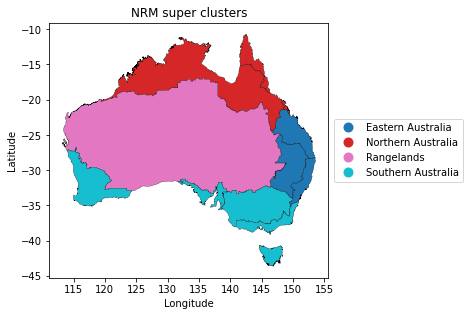

In [14]:
nrm_clusters.plot(
    figsize=[5, 5],
    column='SupClusNm',
    cmap='tab10',
    legend=True,
    linewidth=0.25,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (1.5, 0.5)},
)
plt.title('NRM super clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()